In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
#%precision %2g

In [4]:
path = "http://www.iam.fmph.uniba.sk/ospm/Rosa/PDV/01_nhanes-weight.xls"
#path = "01_nhanes-weight.xls"
data = pd.ExcelFile(path).parse('Sheet1')

# vek nechame v mesiacoch

# prekodovanie Gender
data['Gender'] = data['Gender'].replace({
    0: 'F',
    1: 'M'
})

# vyhodenie chybajucich
data = data.dropna()

data

Gender  Age  Weight  Height  Leg_Length  Arm_Length  Arm_circum  Waist
0         F  241    64.7     163        34.2        36.2        29.0   89.6
1         F  241    54.0     153        37.2        34.0        26.1   85.5
2         M  241    61.4     165        37.7        35.0        31.4   70.1
3         F  241    74.0     171        37.9        36.2        29.8   91.1
4         F  241    63.6     159        38.1        34.0        29.2   74.3
...     ...  ...     ...     ...         ...         ...         ...    ...
4974      M  958    89.5     184        43.0        42.8        32.2  112.8
4975      F  959    78.6     151        35.6        34.2        33.5  114.9
4976      M  959    86.5     175        38.6        41.5        32.8  100.2
4977      F  959    58.0     163        40.2        37.5        26.2   82.8
4978      M  959    76.2     168        40.8        39.5        29.8  103.5

[4978 rows x 8 columns]

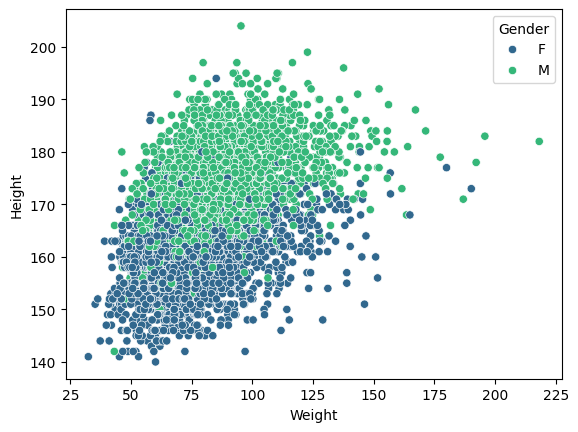

In [5]:
sns.scatterplot(x='Weight', y='Height', hue='Gender', data=data, palette='viridis')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [6]:
# data bez Gender
X = data.copy(deep=True)
X.drop(labels="Gender",axis=1,inplace=True)

# kovariancna matica
S = X.cov()
print(S)

                     Age      Weight      Height  Leg_Length  Arm_Length  \
Age         38883.105335   68.667621 -207.719454 -213.292853   28.969811   
Weight         68.667621  411.764601   90.251266   19.497280   32.606596   
Height       -207.719454   90.251266  100.676444   30.156451   22.123162   
Leg_Length   -213.292853   19.497280   30.156451   16.266087    6.824227   
Arm_Length     28.969811   32.606596   22.123162    6.824227    7.581800   
Arm_circum      6.570130   89.880077   11.310577    1.777859    6.093118   
Waist         710.379057  286.537845   28.839131   -1.847789   17.513559   

            Arm_circum       Waist  
Age           6.570130  710.379057  
Weight       89.880077  286.537845  
Height       11.310577   28.839131  
Leg_Length    1.777859   -1.847789  
Arm_Length    6.093118   17.513559  
Arm_circum   24.791590   64.685810  
Waist        64.685810  250.676298  


In [7]:
L,Q=np.linalg.eig(S)
# L - vlastne hodnoty, zotriedene od najvacsej po najmensiu
# Q - vlastne vektory - prvy vlastny vektor je prvy stlpec
L

array([3.88986046e+04, 6.61325516e+02, 1.06785327e+02, 1.65109907e+01,
       1.78931925e+00, 5.83591361e+00, 4.01052214e+00])

In [8]:
mean = X.mean(axis=0)
X_centered = X - mean
Y = np.dot(X_centered, Q)
Y[0:5]

array([[-3.43646118e+02, -1.62809187e+01, -7.29814690e+00,
        -5.46561888e+00, -1.33838110e+00, -3.36769886e+00,
         3.81966028e-01],
       [-3.43707228e+02, -2.91976475e+01, -1.44692856e+01,
        -5.74843006e+00, -9.83617850e-01,  2.24340519e+00,
        -1.51245293e+00],
       [-3.44041281e+02, -2.91661418e+01,  2.05120226e+00,
         6.90464771e+00,  7.45148115e-01, -2.05015727e+00,
         1.75820572e+00],
       [-3.43663658e+02, -6.53900748e+00,  7.41506040e-01,
        -3.96135111e+00,  3.92556903e-01, -2.67586875e+00,
        -9.56407196e-01],
       [-3.43931216e+02, -2.64821825e+01, -4.38999226e+00,
         6.43711653e+00,  1.45341779e-01, -4.49536404e-02,
        -1.58485676e+00]])

In [9]:
S_transformed = np.cov(Y, rowvar=0)
S_transformed

array([[ 3.88986046e+04,  2.92383268e-13,  9.21007293e-14,
        -3.31124051e-13, -7.05374633e-14, -1.21339056e-13,
        -6.21314444e-14],
       [ 2.92383268e-13,  6.61325516e+02,  2.43043591e-13,
         4.67082270e-13,  2.47840504e-14, -1.04527018e-13,
        -4.34006413e-14],
       [ 9.21007293e-14,  2.43043591e-13,  1.06785327e+02,
         5.54386086e-14,  9.91290634e-15,  3.15397029e-14,
        -3.69933361e-14],
       [-3.31124051e-13,  4.67082270e-13,  5.54386086e-14,
         1.65109907e+01, -1.26975429e-14,  1.05532086e-14,
        -3.62552397e-15],
       [-7.05374633e-14,  2.47840504e-14,  9.91290634e-15,
        -1.26975429e-14,  1.78931925e+00, -3.38068153e-15,
        -1.27757069e-15],
       [-1.21339056e-13, -1.04527018e-13,  3.15397029e-14,
         1.05532086e-14, -3.38068153e-15,  5.83591361e+00,
         9.29687421e-15],
       [-6.21314444e-14, -4.34006413e-14, -3.69933361e-14,
        -3.62552397e-15, -1.27757069e-15,  9.29687421e-15,
         4.0105221

In [10]:
# Funkciou
data_pca=PCA()

# transformovane data
Y = data_pca.fit_transform(X)
Y

array([[-3.43646118e+02, -1.62809187e+01, -7.29814690e+00, ...,
        -3.36769886e+00,  3.81966028e-01,  1.33838110e+00],
       [-3.43707228e+02, -2.91976475e+01, -1.44692856e+01, ...,
         2.24340519e+00, -1.51245293e+00,  9.83617850e-01],
       [-3.44041281e+02, -2.91661418e+01,  2.05120226e+00, ...,
        -2.05015727e+00,  1.75820572e+00, -7.45148115e-01],
       ...,
       [ 3.74362927e+02,  2.09864753e+00,  1.17967998e+01, ...,
        -9.51579587e-01, -1.91952228e-01,  2.01433465e+00],
       [ 3.74039579e+02, -3.34589255e+01,  6.04290067e+00, ...,
         3.50336107e+00, -1.75334567e+00,  1.00268501e+00],
       [ 3.74427158e+02, -5.82551078e+00,  4.29349131e+00, ...,
         3.67639134e+00, -1.32856763e+00,  1.21972140e+00]])

In [11]:
print(data_pca.explained_variance_)

[3.88986046e+04 6.61325516e+02 1.06785327e+02 1.65109907e+01
 5.83591361e+00 4.01052214e+00 1.78931925e+00]


In [12]:
print(data_pca.explained_variance_ratio_)

[9.79940538e-01 1.66602296e-02 2.69015487e-03 4.15947804e-04
 1.47019370e-04 1.01033784e-04 4.50768475e-05]


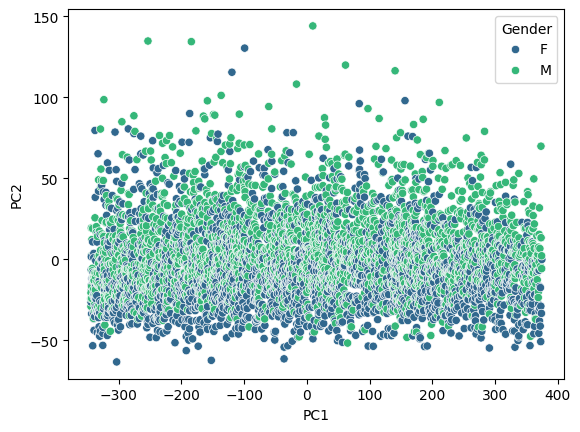

In [13]:
sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=data['Gender'], palette='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [14]:
print(data_pca.components_)
# kazdy riadok: jedna PC
# hodnoty v stlpcoch: akymi kombinaciami dana PCA vznikla

[[ 9.99799486e-01  1.90653762e-03 -5.33848231e-03 -5.48841469e-03
   7.50658712e-04  2.02297155e-04  1.83881869e-02]
 [-1.09562002e-02  7.83371392e-01  1.67185805e-01  3.46107836e-02
   6.14504102e-02  1.71974623e-01  5.68954129e-01]
 [ 1.27528434e-02  7.58892292e-02  8.58682792e-01  2.91384037e-01
   1.70306152e-01 -7.11844405e-02 -3.71168407e-01]
 [-1.04742287e-02 -5.39737148e-01  3.25445771e-01  1.19478897e-02
   4.46915208e-02 -2.74436873e-01  7.24709232e-01]
 [ 2.02905257e-03 -7.26876699e-02 -2.89101476e-01  9.39256892e-01
   1.13007593e-01  9.17275653e-02  8.80031252e-02]
 [-1.03061297e-03 -2.85538787e-01  1.14306702e-01 -1.12988110e-01
   2.63007678e-01  9.05158943e-01  6.44084912e-02]
 [-1.85061690e-03  4.93393084e-02 -1.79230676e-01 -1.36947944e-01
   9.39828714e-01 -2.49630143e-01 -3.30244340e-02]]


In [15]:
# Standardizovane data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# PCA
pca2 = PCA()
Y2 = data_pca.fit_transform(X_standardized)

print(data_pca.explained_variance_)

[3.51770242 1.89594168 0.97717213 0.25711458 0.18269153 0.13295497
 0.03782916]


In [16]:
print(data_pca.components_)

[[ 0.00572295  0.4899516   0.37555163  0.27493251  0.44086271  0.42739859
   0.40774782]
 [-0.31656621 -0.22786647  0.43855142  0.55214794  0.25031196 -0.32813422
  -0.42466442]
 [ 0.90002249 -0.15209498  0.18605485  0.01526849  0.26043391 -0.25156557
  -0.0294286 ]
 [ 0.23725057  0.05107881 -0.32175334  0.76930985 -0.47071609  0.12923649
   0.08639767]
 [ 0.03198536 -0.23759289 -0.51751118  0.08081667  0.5387013   0.48250392
  -0.38100955]
 [ 0.16695271  0.02529007  0.46073517 -0.14174281 -0.40056669  0.55973839
  -0.51512964]
 [ 0.06729414  0.79069109 -0.21999384 -0.02918287  0.05414577 -0.28905705
  -0.48429787]]


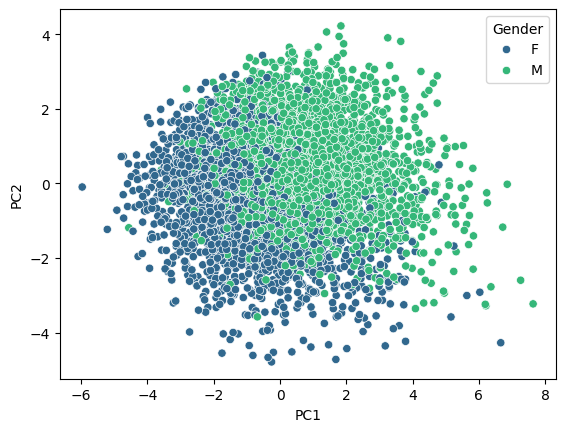

In [17]:
sns.scatterplot(x=Y2[:,0], y=Y2[:,1], hue=data['Gender'], palette='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()